In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Trial.zip'

Archive:  /content/drive/MyDrive/Trial.zip
   creating: Trial/Sensor1/
  inflating: Trial/Sensor1/Sensor1Jain1.bmp  
  inflating: Trial/Sensor1/Sensor1Jain10.bmp  
  inflating: Trial/Sensor1/Sensor1Jain2.bmp  
  inflating: Trial/Sensor1/Sensor1Jain3.bmp  
  inflating: Trial/Sensor1/Sensor1Jain4.bmp  
  inflating: Trial/Sensor1/Sensor1Jain5.bmp  
  inflating: Trial/Sensor1/Sensor1Jain6.bmp  
  inflating: Trial/Sensor1/Sensor1Jain7.bmp  
  inflating: Trial/Sensor1/Sensor1Jain8.bmp  
  inflating: Trial/Sensor1/Sensor1Jain9.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy1.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy10.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy2.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy3.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy4.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy5.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy6.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy7.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy8.bmp  
  inflating: Trial/Sensor1/Sensor1Nimmy9.bmp

In [ ]:
!unzip '/content/drive/MyDrive/Fingerprint.zip'

Archive:  /content/drive/MyDrive/Fingerprint.zip
   creating: Fingerprint/Sensor1/
  inflating: Fingerprint/Sensor1/fingerprint0.bmp  
  inflating: Fingerprint/Sensor1/fingerprint1.bmp  
  inflating: Fingerprint/Sensor1/fingerprint10.bmp  
  inflating: Fingerprint/Sensor1/fingerprint100.bmp  
  inflating: Fingerprint/Sensor1/fingerprint101.bmp  
  inflating: Fingerprint/Sensor1/fingerprint102.bmp  
  inflating: Fingerprint/Sensor1/fingerprint103.bmp  
  inflating: Fingerprint/Sensor1/fingerprint104.bmp  
  inflating: Fingerprint/Sensor1/fingerprint105.bmp  
  inflating: Fingerprint/Sensor1/fingerprint106.bmp  
  inflating: Fingerprint/Sensor1/fingerprint107.bmp  
  inflating: Fingerprint/Sensor1/fingerprint108.bmp  
  inflating: Fingerprint/Sensor1/fingerprint109.bmp  
  inflating: Fingerprint/Sensor1/fingerprint11.bmp  
  inflating: Fingerprint/Sensor1/fingerprint110.bmp  
  inflating: Fingerprint/Sensor1/fingerprint111.bmp  
  inflating: Fingerprint/Sensor1/fingerprint112.bmp  
  inf

In [ ]:
import cv2
from glob import glob
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pathlib

### One vs Two

In [ ]:
test_folder_path = '/content/Trial'
# Get the list of class (species) folders
train_class_folders = glob(test_folder_path + '/*')

# Initialize lists to store x_test and y_test
x_test = []
y_test = []

# Load x_test and y_test from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    # Get the list of image file paths in the current class folder
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(1)
    if label == "Sensor2":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(0)

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Optionally, normalize pixel values to be in the range [0, 1]
#x_test = x_test.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", x_test.shape)
print("y_train shape:", y_test.shape)


x_train shape: (40, 288, 256, 3)
y_train shape: (40,)


In [ ]:
train_folder_path = '/content/Fingerprint'
# Get the list of class (species) folders
train_class_folders = glob(train_folder_path + '/*')

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(1)
    if label == "Sensor2":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(0)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, normalize pixel values to be in the range [0, 1]
#images = images.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)
print("y_train shape:", labels.shape)


x_train shape: (569, 288, 256, 3)
y_train shape: (569,)


In [ ]:
num_classes = 2

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
input_shape = images.shape[1:]
print(input_shape)

(288, 256, 3)


In [ ]:
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [ ]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [ ]:
print(y_train)

[1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1
 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1
 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1]


In [ ]:
model=keras.applications.MobileNet(
    input_shape=input_shape,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.01,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)

batch=8
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    patience=20,
    restore_best_weights=True
)

# Compile the model
model.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['binary_accuracy'])


In [ ]:
trained_model1 = model.fit(x_train, y_train,
    epochs=100,
    batch_size=batch,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])

Epoch 1/100
50/50 [==============================] - 16s 90ms/step - loss: 0.6606 - binary_accuracy: 0.5804 - val_loss: 0.7078 - val_binary_accuracy: 0.5322
Epoch 2/100
50/50 [==============================] - 3s 63ms/step - loss: 0.5475 - binary_accuracy: 0.7387 - val_loss: 0.8080 - val_binary_accuracy: 0.5322
Epoch 3/100
50/50 [==============================] - 3s 63ms/step - loss: 0.5031 - binary_accuracy: 0.7588 - val_loss: 1.0106 - val_binary_accuracy: 0.5322
Epoch 4/100
50/50 [==============================] - 3s 64ms/step - loss: 0.4806 - binary_accuracy: 0.7839 - val_loss: 1.2457 - val_binary_accuracy: 0.5322
Epoch 5/100
50/50 [==============================] - 3s 65ms/step - loss: 0.3791 - binary_accuracy: 0.8191 - val_loss: 1.6016 - val_binary_accuracy: 0.5322
Epoch 6/100
50/50 [==============================] - 3s 64ms/step - loss: 0.2854 - binary_accuracy: 0.8769 - val_loss: 2.2920 - val_binary_accuracy: 0.5322
Epoch 7/100
50/50 [==============================] - 3s 65ms/st

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

2/2 [==============================] - 2s 19ms/step - loss: 0.1555 - binary_accuracy: 0.9500


[0.15554451942443848, 0.949999988079071]

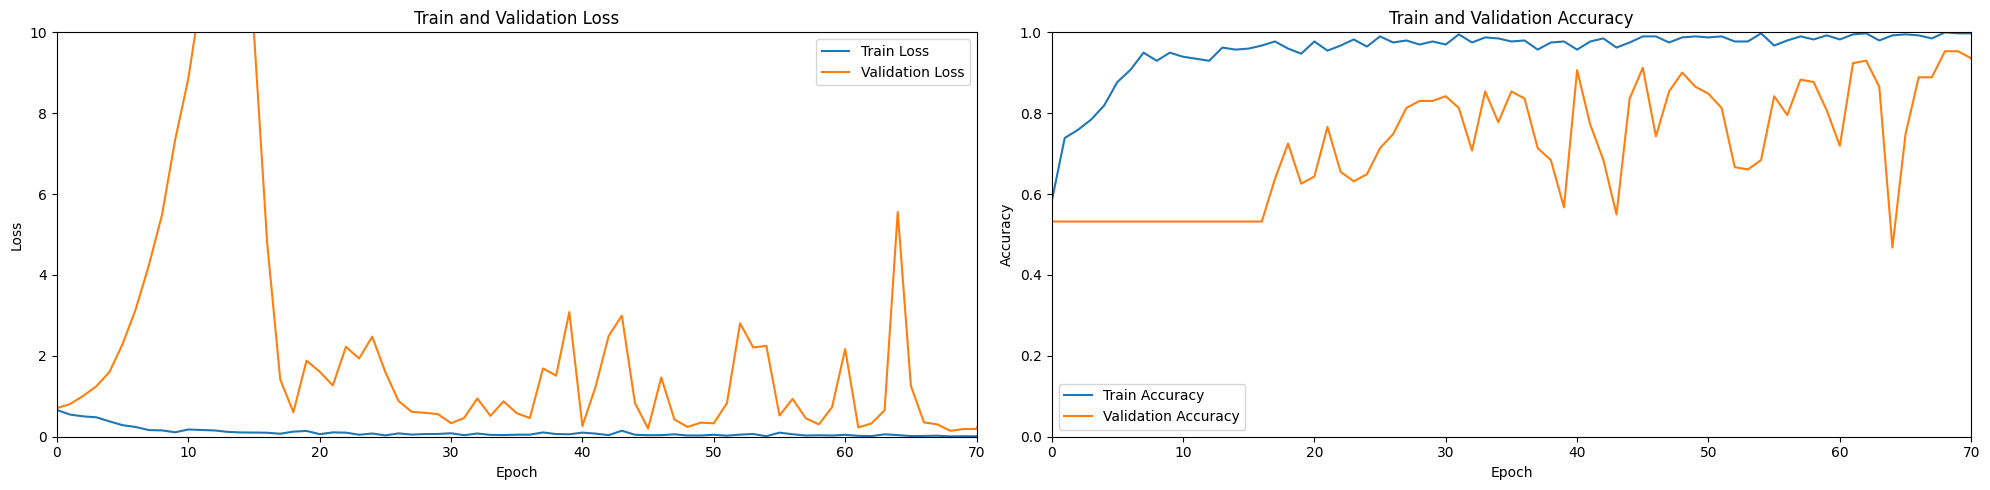

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model1.history['loss'],label="Train Loss")
plt.plot(trained_model1.history['val_loss'], label="Validation Loss")
plt.xlim(0,100)
plt.ylim(0,15)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model1.history['binary_accuracy'], label="Train Accuracy")
plt.plot(trained_model1.history['val_binary_accuracy'], label="Validation Accuracy")
plt.xlim(0,100)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_test)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


2/2 [==============================] - 1s 58ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_val)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_val.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


6/6 [==============================] - 1s 206ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        80
           1       0.98      0.99      0.98        91

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### One and All


In [ ]:
test_folder_path = '/content/Trial'
# Get the list of class (species) folders
train_class_folders = glob(test_folder_path + '/*')

# Initialize lists to store x_test and y_test
x_test = []
y_test = []

# Load x_test and y_test from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    # Get the list of image file paths in the current class folder
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(1)
    else:
      image_files = glob(class_folder + '/*.bmp')
      count=0
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(0)
          count+=1
          if count==2:
            break

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Optionally, normalize pixel values to be in the range [0, 1]
#x_test = x_test.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", x_test.shape)
print("y_train shape:", y_test.shape)


x_train shape: (38, 288, 256, 3)
y_train shape: (38,)


In [ ]:
train_folder_path = '/content/Fingerprint'
# Get the list of class (species) folders
train_class_folders = glob(train_folder_path + '/*')

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(1)
    else:
      image_files = glob(class_folder + '/*.bmp')
      count=0
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(0)
          count+=1
          if count==30:
            break

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, normalize pixel values to be in the range [0, 1]
#images = images.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)
print("y_train shape:", labels.shape)


x_train shape: (549, 288, 256, 3)
y_train shape: (549,)


In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
input_shape = images.shape[1:]
print(input_shape)

(288, 256, 3)


In [ ]:
model2=keras.applications.MobileNet(
    input_shape=input_shape,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)

batch=8
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    patience=20,
    restore_best_weights=True
)

# Compile the model
model2.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['binary_accuracy'])


In [ ]:
trained_model2 = model2.fit(x_train, y_train,
    epochs=100,
    batch_size=batch,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])

Epoch 1/100
48/48 [==============================] - 26s 101ms/step - loss: 0.6852 - binary_accuracy: 0.5495 - val_loss: 0.6920 - val_binary_accuracy: 0.5244
Epoch 2/100
48/48 [==============================] - 3s 58ms/step - loss: 0.6408 - binary_accuracy: 0.6432 - val_loss: 0.6954 - val_binary_accuracy: 0.5244
Epoch 3/100
48/48 [==============================] - 3s 59ms/step - loss: 0.5933 - binary_accuracy: 0.6823 - val_loss: 0.7111 - val_binary_accuracy: 0.5244
Epoch 4/100
48/48 [==============================] - 3s 61ms/step - loss: 0.5252 - binary_accuracy: 0.7526 - val_loss: 0.7548 - val_binary_accuracy: 0.5244
Epoch 5/100
48/48 [==============================] - 3s 58ms/step - loss: 0.3456 - binary_accuracy: 0.8724 - val_loss: 0.8733 - val_binary_accuracy: 0.5244
Epoch 6/100
48/48 [==============================] - 3s 58ms/step - loss: 0.2711 - binary_accuracy: 0.8906 - val_loss: 1.0884 - val_binary_accuracy: 0.5244
Epoch 7/100
48/48 [==============================] - 3s 58ms/s

In [ ]:
model2.evaluate(x_test,y_test,verbose=1)

3/3 [==============================] - 3s 619ms/step - loss: 0.4132 - binary_accuracy: 0.8675


[0.41324031352996826, 0.8674699068069458]

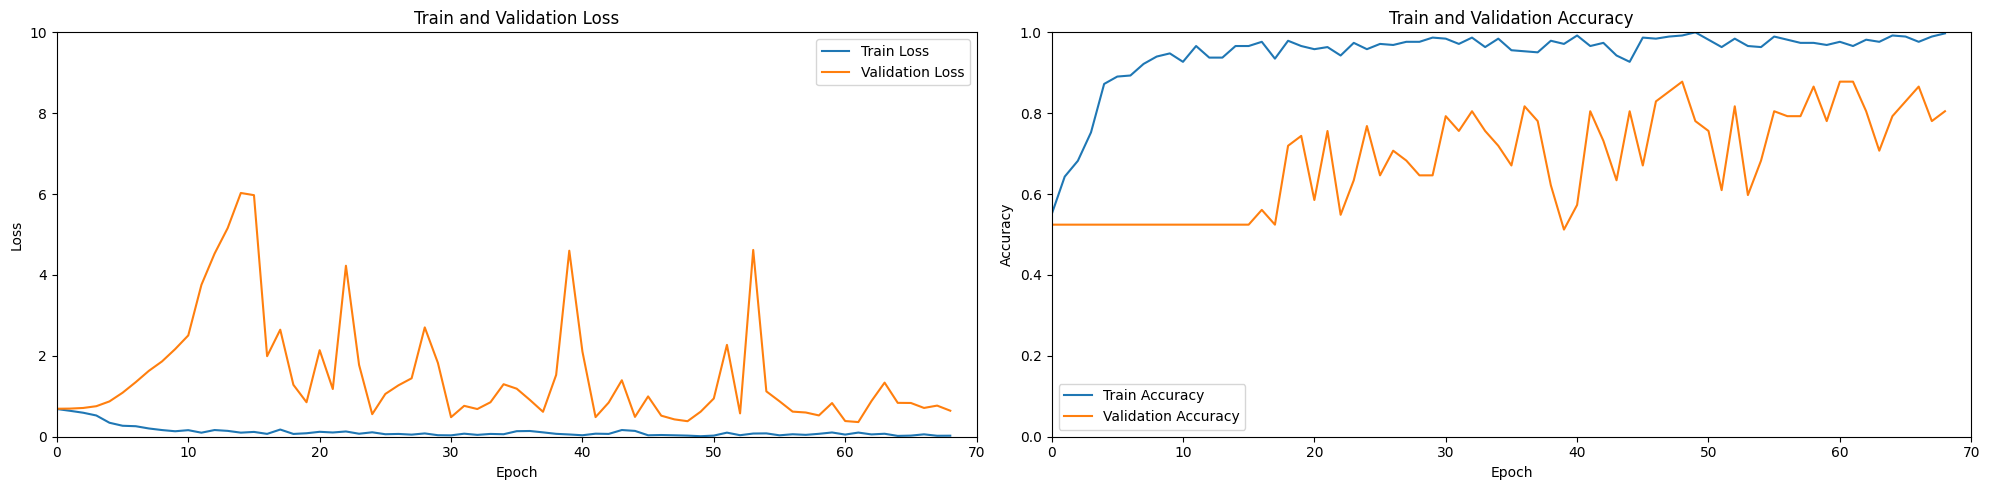

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model2.history['loss'],label="Train Loss")
plt.plot(trained_model2.history['val_loss'], label="Validation Loss")
plt.xlim(0,70)
plt.ylim(0,10)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model2.history['binary_accuracy'], label="Train Accuracy")
plt.plot(trained_model2.history['val_binary_accuracy'], label="Validation Accuracy")
plt.xlim(0,70)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model2.predict(x_test)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


3/3 [==============================] - 1s 65ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.94      0.79      0.86        42

    accuracy                           0.87        83
   macro avg       0.88      0.87      0.87        83
weighted avg       0.88      0.87      0.87        83



In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model2.predict(x_val)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_val.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


3/3 [==============================] - 2s 859ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.87      0.87      0.87        39

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



### Second Trial - Dropout

In [ ]:
test_folder_path = '/content/Trial'
# Get the list of class (species) folders
train_class_folders = glob(test_folder_path + '/*')

# Initialize lists to store x_test and y_test
x_test = []
y_test = []

# Load x_test and y_test from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    # Get the list of image file paths in the current class folder
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(1)
    else:
      image_files = glob(class_folder + '/*.bmp')
      count=0
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(0)
          count+=1
          if count==2:
            break

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Optionally, normalize pixel values to be in the range [0, 1]
#x_test = x_test.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", x_test.shape)
print("y_train shape:", y_test.shape)


x_train shape: (38, 288, 256, 3)
y_train shape: (38,)


In [ ]:
train_folder_path = '/content/Fingerprint'
# Get the list of class (species) folders
train_class_folders = glob(train_folder_path + '/*')

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(1)
    else:
      image_files = glob(class_folder + '/*.bmp')
      count=0
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(0)
          count+=1
          if count==30:
            break

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, normalize pixel values to be in the range [0, 1]
#images = images.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)
print("y_train shape:", labels.shape)


x_train shape: (549, 288, 256, 3)
y_train shape: (549,)


In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
input_shape = images.shape[1:]
print(input_shape)

(288, 256, 3)


In [ ]:
model3=keras.applications.MobileNet(
    input_shape=input_shape,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.1,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)

batch=8
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    patience=20,
    restore_best_weights=True
)

# Compile the model
model3.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.0002),
                 metrics=['binary_accuracy'])


In [ ]:
trained_model3 = model3.fit(x_train, y_train,
    epochs=200,
    batch_size=batch,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])

Epoch 1/200
48/48 [==============================] - 14s 79ms/step - loss: 0.6978 - binary_accuracy: 0.5599 - val_loss: 0.6960 - val_binary_accuracy: 0.5244
Epoch 2/200
48/48 [==============================] - 3s 60ms/step - loss: 0.6102 - binary_accuracy: 0.6771 - val_loss: 0.7402 - val_binary_accuracy: 0.5244
Epoch 3/200
48/48 [==============================] - 3s 59ms/step - loss: 0.5231 - binary_accuracy: 0.7422 - val_loss: 0.8546 - val_binary_accuracy: 0.5244
Epoch 4/200
48/48 [==============================] - 3s 59ms/step - loss: 0.4389 - binary_accuracy: 0.8047 - val_loss: 1.0550 - val_binary_accuracy: 0.5244
Epoch 5/200
48/48 [==============================] - 3s 60ms/step - loss: 0.3043 - binary_accuracy: 0.8646 - val_loss: 1.4335 - val_binary_accuracy: 0.5244
Epoch 6/200
48/48 [==============================] - 3s 62ms/step - loss: 0.2456 - binary_accuracy: 0.9036 - val_loss: 1.9400 - val_binary_accuracy: 0.5244
Epoch 7/200
48/48 [==============================] - 3s 61ms/st

In [ ]:
model3.evaluate(x_test,y_test,verbose=1)

3/3 [==============================] - 0s 49ms/step - loss: 0.4746 - binary_accuracy: 0.8193


[0.4745793044567108, 0.8192771077156067]

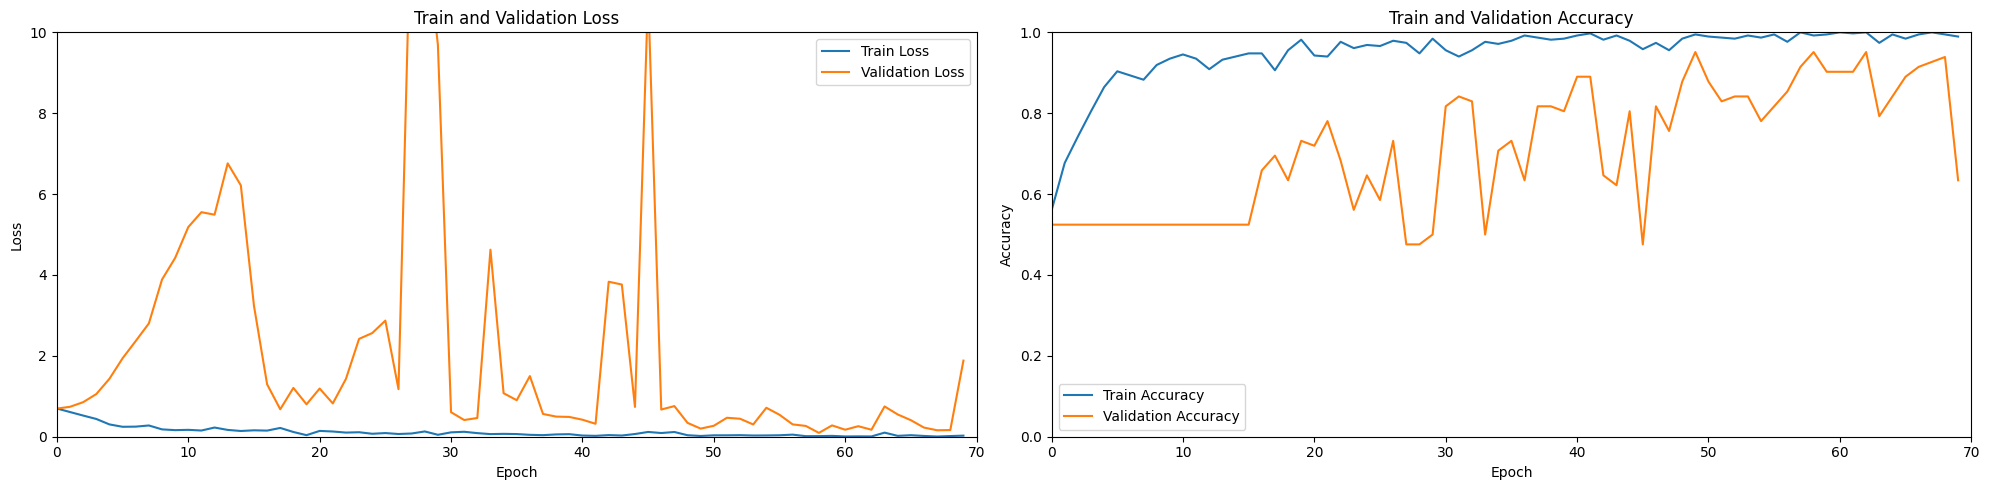

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model3.history['loss'],label="Train Loss")
plt.plot(trained_model3.history['val_loss'], label="Validation Loss")
plt.xlim(0,70)
plt.ylim(0,10)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model3.history['binary_accuracy'], label="Train Accuracy")
plt.plot(trained_model3.history['val_binary_accuracy'], label="Validation Accuracy")
plt.xlim(0,70)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model3.predict(x_test)

y_pred_classes = (y_pred_prob > 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


3/3 [==============================] - 1s 45ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.86      0.76      0.81        42

    accuracy                           0.82        83
   macro avg       0.82      0.82      0.82        83
weighted avg       0.82      0.82      0.82        83



In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model3.predict(x_val)

y_pred_classes = (y_pred_prob > 0.5).astype(int).reshape(-1)
y_true = y_val.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


3/3 [==============================] - 0s 44ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.97      0.92      0.95        39

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



### Trial 3 - One and ALL

In [ ]:
train_folder_path = '/content/Fingerprint'
# Get the list of class (species) folders
train_class_folders = glob(train_folder_path + '/*')

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(1)
    else:
      image_files = glob(class_folder + '/*.bmp')
      count=0
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(0)
          count+=1
          if count==30:
            break

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, normalize pixel values to be in the range [0, 1]
#images = images.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)
print("y_train shape:", labels.shape)


x_train shape: (549, 288, 256, 3)
y_train shape: (549,)


In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4,random_state=31)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5,random_state=31)

In [ ]:
input_shape = images.shape[1:]
print(input_shape)

(288, 256, 3)


In [ ]:
model4=keras.applications.MobileNet(
    input_shape=input_shape,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.01,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)

batch=8
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)

# Compile the model
model4.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['binary_accuracy'])


In [ ]:
trained_model4 = model4.fit(x_train, y_train,
    epochs=200,
    batch_size=batch,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])

Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 374ms/step - binary_accuracy: 0.4684 - loss: 0.7568 - val_binary_accuracy: 0.4909 - val_loss: 0.6942
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - binary_accuracy: 0.6434 - loss: 0.6425 - val_binary_accuracy: 0.4909 - val_loss: 0.6934
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - binary_accuracy: 0.6348 - loss: 0.6512 - val_binary_accuracy: 0.5091 - val_loss: 0.6936
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - binary_accuracy: 0.6948 - loss: 0.5726 - val_binary_accuracy: 0.5091 - val_loss: 0.7078
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - binary_accuracy: 0.7996 - loss: 0.4837 - val_binary_accuracy: 0.5091 - val_loss: 0.7717
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - binary_accuracy: 0.8993 - loss: 0.2904 - val_binary_accuracy: 0.5091 - val_loss: 0.9535
Epoch 7/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - binary_accuracy: 0.8953 - loss: 0.2571 - val_binary_accuracy: 0.5091 - val_loss: 1.2395
Epo

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - binary_accuracy: 0.8549 - loss: 0.4833


[0.4782537519931793, 0.8508771657943726]

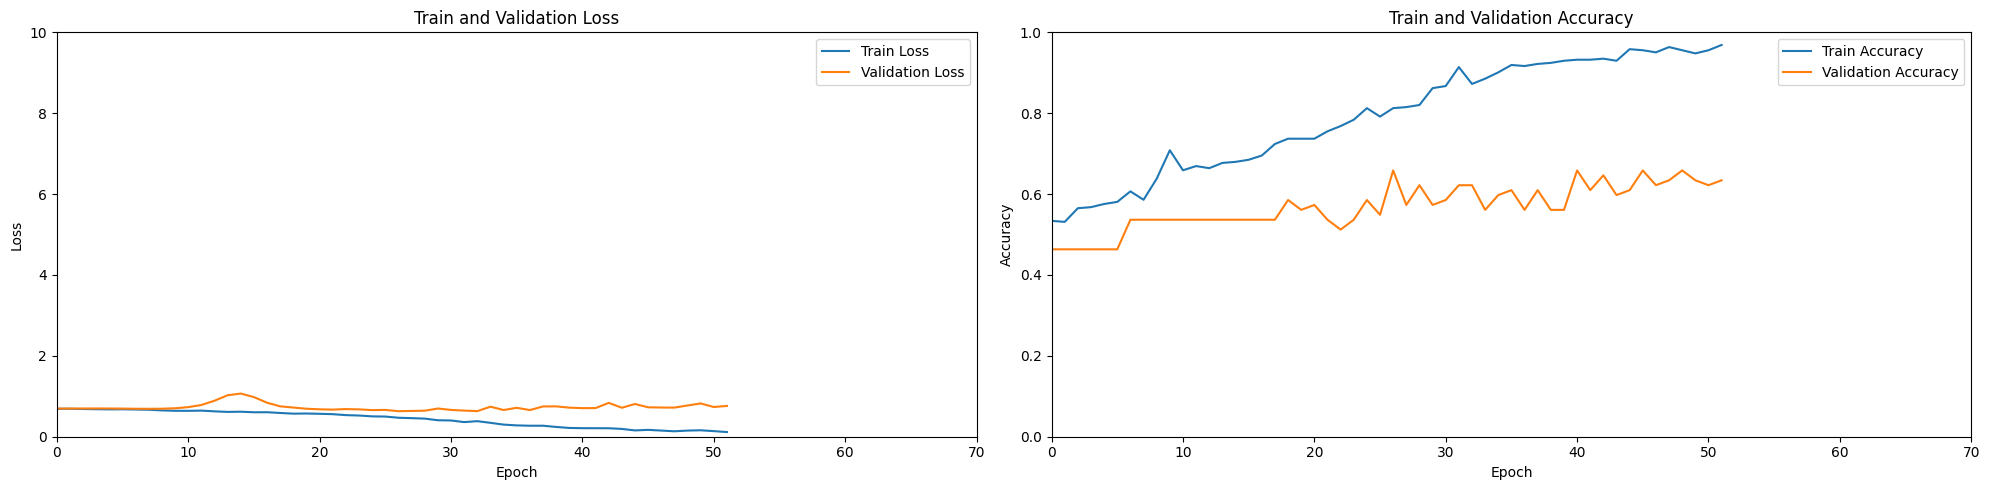

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model4.history['loss'],label="Train Loss")
plt.plot(trained_model4.history['val_loss'], label="Validation Loss")
plt.xlim(0,70)
plt.ylim(0,10)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model4.history['binary_accuracy'], label="Train Accuracy")
plt.plot(trained_model4.history['val_binary_accuracy'], label="Validation Accuracy")
plt.xlim(0,70)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_test)

y_pred_classes = (y_pred_prob > 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 903ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_val)

y_pred_classes = (y_pred_prob > 0.5).astype(int).reshape(-1)
y_true = y_val.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        58
           1       0.98      0.95      0.96        56

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### One vs Two Augmented


In [ ]:
test_folder_path = '/content/Trial'
# Get the list of class (species) folders
train_class_folders = glob(test_folder_path + '/*')

# Initialize lists to store x_test and y_test
x_test = []
y_test = []

# Load x_test and y_test from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    # Get the list of image file paths in the current class folder
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(1)
    if label == "Sensor2":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(0)

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Optionally, normalize pixel values to be in the range [0, 1]
#x_test = x_test.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", x_test.shape)
print("y_train shape:", y_test.shape)


x_train shape: (40, 288, 256, 3)
y_train shape: (40,)


In [ ]:
train_folder_path = '/content/drive/MyDrive/Dataset'
# Get the list of class (species) folders
train_class_folders = glob(train_folder_path + '/*')

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(1)
    if label == "Sensor2":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(0)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, normalize pixel values to be in the range [0, 1]
#images = images.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)
print("y_train shape:", labels.shape)


x_train shape: (3130, 288, 256, 3)
y_train shape: (3130,)


In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42,shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42,shuffle=True)

In [ ]:
input_shape = images.shape[1:]
print(input_shape)

(288, 256, 3)


In [ ]:
model=keras.applications.MobileNet(
    input_shape=input_shape,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.01,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)

batch=8
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    patience=20,
    restore_best_weights=True
)

# Compile the model
model.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['binary_accuracy'])


In [ ]:
trained_model1 = model.fit(x_train, y_train,
    epochs=100,
    batch_size=batch,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 60s 109ms/step - binary_accuracy: 0.6884 - loss: 0.6089 - val_binary_accuracy: 0.4925 - val_loss: 1.2159
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 44s 36ms/step - binary_accuracy: 0.7336 - loss: 0.5330 - val_binary_accuracy: 0.4925 - val_loss: 4.3465
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - binary_accuracy: 0.7925 - loss: 0.4513 - val_binary_accuracy: 0.5181 - val_loss: 1.7048
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - binary_accuracy: 0.8202 - loss: 0.4033 - val_binary_accuracy: 0.6759 - val_loss: 0.6884
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - binary_accuracy: 0.8614 - loss: 0.3500 - val_binary_accuracy: 0.7463 - val_loss: 0.5127
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - binary_accuracy: 0.8670 - loss: 0.3051 - val_binary_accuracy: 0.5075 - val_loss: 1.6559
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - binary_accuracy: 0.8885 - loss: 0.2566 - val_binary_accuracy: 0.7697 - v

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 361ms/step - binary_accuracy: 0.8350 - loss: 0.5540


[0.5800938606262207, 0.8212766051292419]

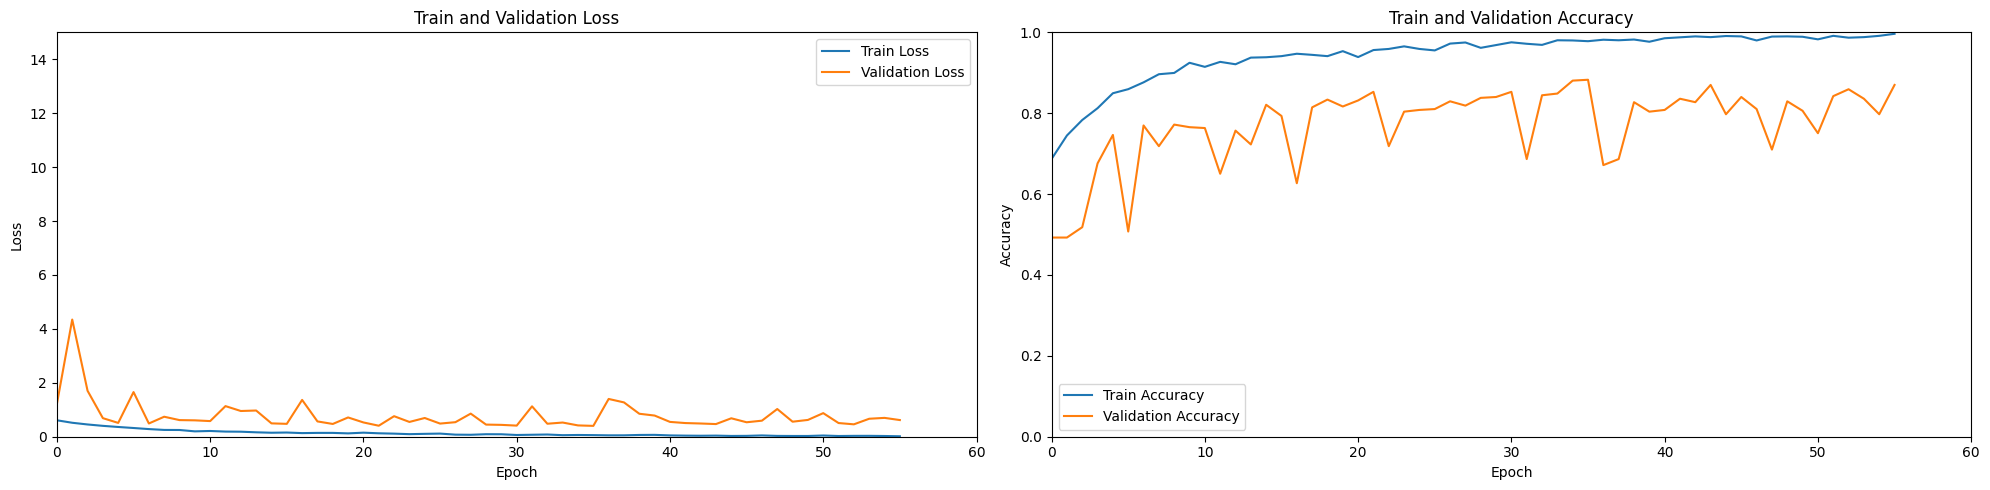

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model1.history['loss'],label="Train Loss")
plt.plot(trained_model1.history['val_loss'], label="Validation Loss")
plt.xlim(0,60)
plt.ylim(0,15)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model1.history['binary_accuracy'], label="Train Accuracy")
plt.plot(trained_model1.history['val_binary_accuracy'], label="Validation Accuracy")
plt.xlim(0,60)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

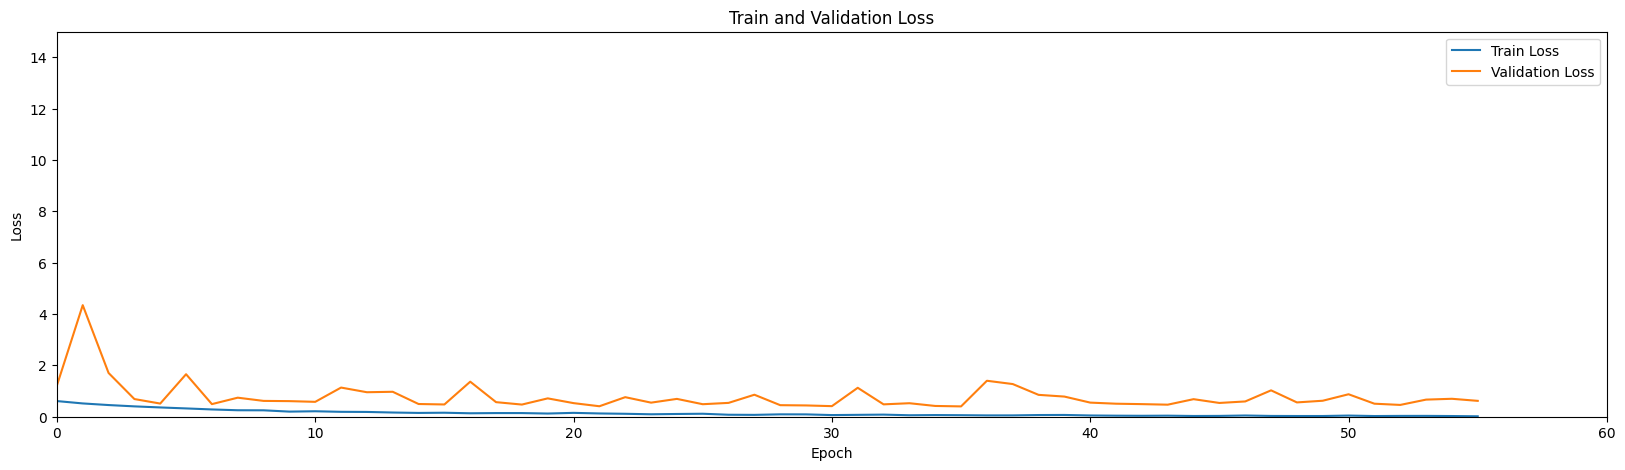

In [ ]:
plt.figure(figsize = (20,5))
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model1.history['loss'],label="Train Loss")
plt.plot(trained_model1.history['val_loss'], label="Validation Loss")
plt.xlim(0,60)
plt.ylim(0,15)
plt.legend()
plt.savefig("loss.eps", format="eps")

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_test)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       251
           1       0.79      0.84      0.81       219

    accuracy                           0.82       470
   macro avg       0.82      0.82      0.82       470
weighted avg       0.82      0.82      0.82       470



In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_val)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_val.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       238
           1       0.87      0.90      0.88       231

    accuracy                           0.88       469
   macro avg       0.88      0.88      0.88       469
weighted avg       0.88      0.88      0.88       469



###Unrelated Data

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_test)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.86      0.60      0.71        20

    accuracy                           0.75        40
   macro avg       0.77      0.75      0.74        40
weighted avg       0.77      0.75      0.74        40



In [ ]:
model.save('/content/drive/MyDrive/Models/1v2Augmented.h5')

### One vs ALL Augmented

In [ ]:
train_folder_path = '/content/drive/MyDrive/Dataset'
# Get the list of class (species) folders
train_class_folders = glob(train_folder_path + '/*')

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(1)
    else:
      image_files = glob(class_folder + '/*.bmp')
      count=0
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(0)
          count+=1
          if count==177:
            break

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, normalize pixel values to be in the range [0, 1]
#images = images.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)
print("y_train shape:", labels.shape)

x_train shape: (3128, 288, 256, 3)
y_train shape: (3128,)


In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

In [ ]:
input_shape = images.shape[1:]
print(input_shape)

(288, 256, 3)


In [ ]:
model=keras.applications.MobileNet(
    input_shape=input_shape,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.01,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)

batch=8
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    patience=20,
    restore_best_weights=True
)

# Compile the model
model.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['binary_accuracy'])


In [ ]:
trained_model1 = model.fit(x_train, y_train,
    epochs=100,
    batch_size=batch,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - binary_accuracy: 0.5434 - loss: 0.6814 - val_binary_accuracy: 0.4840 - val_loss: 0.6979
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - binary_accuracy: 0.6546 - loss: 0.6083 - val_binary_accuracy: 0.5160 - val_loss: 2.7150
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - binary_accuracy: 0.7241 - loss: 0.5386 - val_binary_accuracy: 0.5160 - val_loss: 2.3288
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - binary_accuracy: 0.7568 - loss: 0.4862 - val_binary_accuracy: 0.5394 - val_loss: 2.0458
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - binary_accuracy: 0.7714 - loss: 0.4671 - val_binary_accuracy: 0.5437 - val_loss: 1.3448
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - binary_accuracy: 0.7915 - loss: 0.4511 - val_binary_accuracy: 0.5949 - val_loss: 1.0027
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - binary_accuracy: 0.8258 - loss: 0.3849 - val_binary_accuracy: 0.7207 - v

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - binary_accuracy: 0.8047 - loss: 0.6131


[0.5683789253234863, 0.8255318999290466]

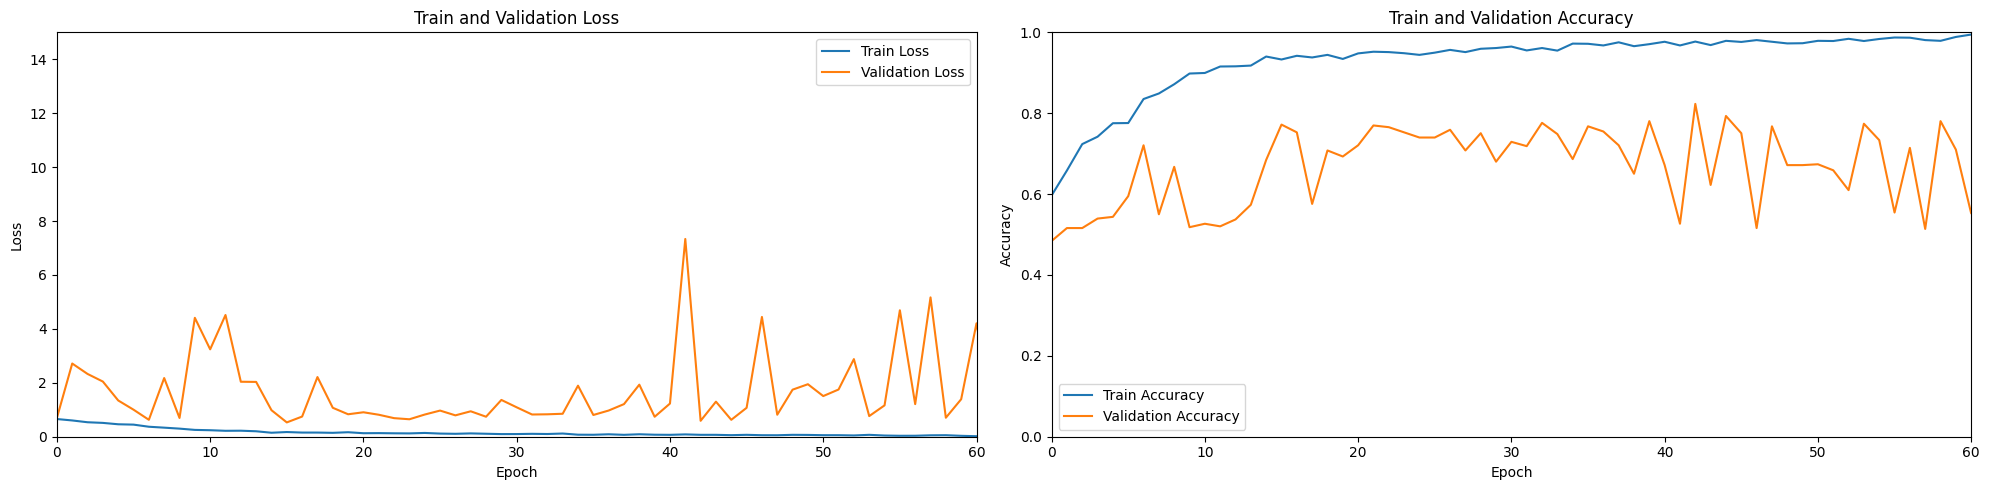

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model1.history['loss'],label="Train Loss")
plt.plot(trained_model1.history['val_loss'], label="Validation Loss")
plt.xlim(0,60)
plt.ylim(0,15)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model1.history['binary_accuracy'], label="Train Accuracy")
plt.plot(trained_model1.history['val_binary_accuracy'], label="Validation Accuracy")
plt.xlim(0,60)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

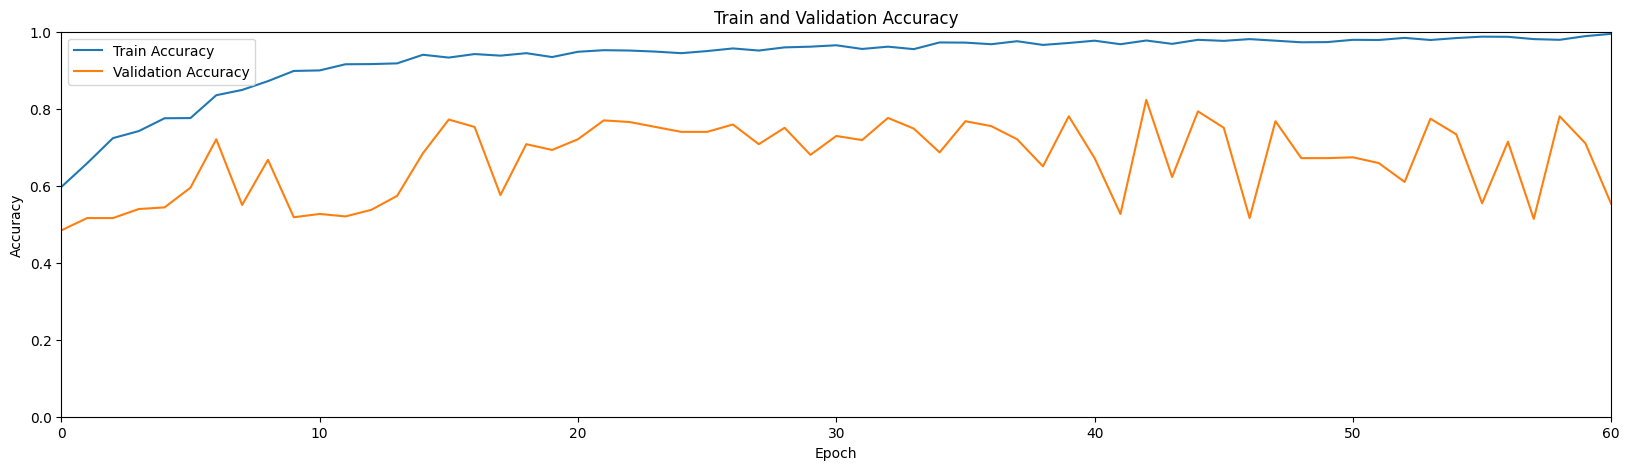

In [ ]:
plt.figure(figsize = (20,5))
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model1.history['binary_accuracy'], label="Train Accuracy")
plt.plot(trained_model1.history['val_binary_accuracy'], label="Validation Accuracy")
plt.xlim(0,60)
plt.ylim(0,1)
plt.legend()
plt.savefig("Allaccuracy.eps", format="eps")

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_test)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       230
           1       0.88      0.76      0.82       240

    accuracy                           0.83       470
   macro avg       0.83      0.83      0.83       470
weighted avg       0.83      0.83      0.82       470



In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_val)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_val.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       242
           1       0.87      0.74      0.80       227

    accuracy                           0.82       469
   macro avg       0.83      0.82      0.82       469
weighted avg       0.83      0.82      0.82       469



###Unrelated Data

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_test)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.89      0.65        18
           1       0.71      0.25      0.37        20

    accuracy                           0.55        38
   macro avg       0.62      0.57      0.51        38
weighted avg       0.62      0.55      0.50        38



In [ ]:
model.save('/content/drive/MyDrive/Models/1vALL-Augmented.h5')

###One v Two - New

In [ ]:
import cv2
from glob import glob
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pathlib

In [ ]:
test_folder_path = '/content/Trial'
# Get the list of class (species) folders
train_class_folders = glob(test_folder_path + '/*')

# Initialize lists to store x_test and y_test
x_test = []
y_test = []

# Load x_test and y_test from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    # Get the list of image file paths in the current class folder
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(1)
    if label == "Sensor2":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(0)

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Optionally, normalize pixel values to be in the range [0, 1]
#x_test = x_test.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", x_test.shape)
print("y_train shape:", y_test.shape)


x_train shape: (40, 288, 256, 3)
y_train shape: (40,)


In [ ]:
train_folder_path = '/content/Fingerprint'
# Get the list of class (species) folders
train_class_folders = glob(train_folder_path + '/*')

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(1)
    if label == "Sensor2":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(0)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, normalize pixel values to be in the range [0, 1]
#images = images.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)
print("y_train shape:", labels.shape)


x_train shape: (569, 288, 256, 3)
y_train shape: (569,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
input_shape = images.shape[1:]
print(input_shape)

(288, 256, 3)


In [ ]:
model=keras.applications.MobileNet(
    input_shape=input_shape,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.01,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)

batch=8
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    patience=20,
    restore_best_weights=True
)

# Compile the model
model.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['binary_accuracy'])


In [ ]:
trained_model1 = model.fit(x_train, y_train,
    epochs=120,
    batch_size=batch,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])

Epoch 1/120
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 328ms/step - binary_accuracy: 0.6197 - loss: 0.6456 - val_binary_accuracy: 0.5322 - val_loss: 0.7111
Epoch 2/120
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - binary_accuracy: 0.7311 - loss: 0.5610 - val_binary_accuracy: 0.5322 - val_loss: 0.7984
Epoch 3/120
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - binary_accuracy: 0.7923 - loss: 0.4975 - val_binary_accuracy: 0.5322 - val_loss: 0.9052
Epoch 4/120
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - binary_accuracy: 0.8079 - loss: 0.4128 - val_binary_accuracy: 0.5322 - val_loss: 1.0650
Epoch 5/120
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - binary_accuracy: 0.8720 - loss: 0.3018 - val_binary_accuracy: 0.5322 - val_loss: 1.3385
Epoch 6/120
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - binary_accuracy: 0.8779 - loss: 0.2724 - val_binary_accuracy: 0.5322 - val_loss: 1.6787
Epoch 7/120
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - binary_accuracy: 0.9625 - loss: 0.1675 - val_binary_accuracy: 0.5322 - val_loss: 2.1867
Epoc

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - binary_accuracy: 0.9729 - loss: 0.1431


[0.13694123923778534, 0.9750000238418579]

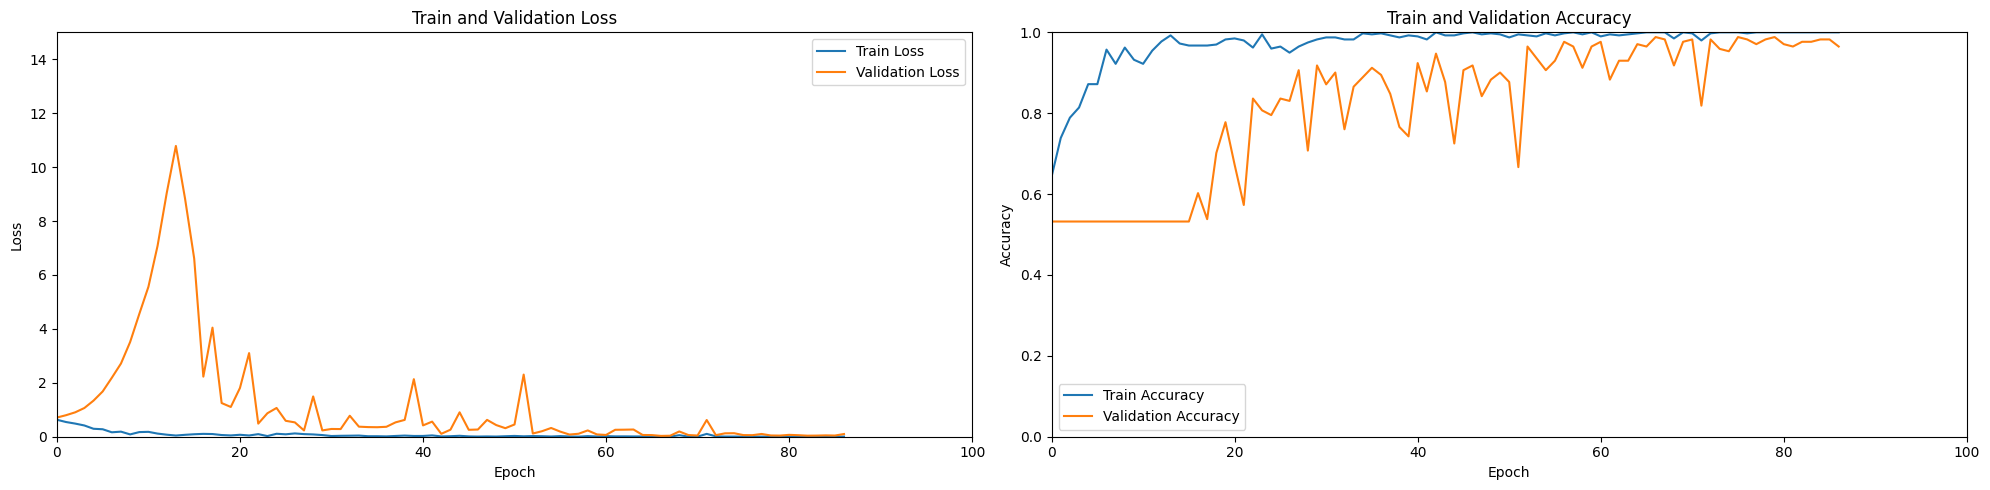

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model1.history['loss'],label="Train Loss")
plt.plot(trained_model1.history['val_loss'], label="Validation Loss")
plt.xlim(0,100)
plt.ylim(0,15)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model1.history['binary_accuracy'], label="Train Accuracy")
plt.plot(trained_model1.history['val_binary_accuracy'], label="Validation Accuracy")
plt.xlim(0,100)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_test)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_val)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_val.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.99      0.99      0.99        91

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [ ]:
model.save('/content/drive/MyDrive/Models/OnevTwo.h5')

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
# Specify the image file path
image_file = '/content/Fingerprint/Sensor2/fingerprint10.bmp'

# Read the image
img = cv2.imread(image_file)
# Expand the dimensions to create a batch of one image (1, 288, 256, 3)
img = np.expand_dims(img, axis=0)

# Make a prediction for the single image
prediction = model.predict(img)

# Remove the batch dimension (optional, if you only care about the single prediction)
single_prediction = prediction[0][0]

# Convert the prediction to a binary class label (0 or 1)
class_label = (single_prediction >= 0.5).astype(int)

# Print the predicted class label
print(f"Predicted class label: {class_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class label: 0


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Models/oneVall100.h5')

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_test)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 757ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      0.65      0.79        20

    accuracy                           0.82        38
   macro avg       0.86      0.82      0.81        38
weighted avg       0.87      0.82      0.81        38



### OneVAll - New

In [ ]:
import cv2
from glob import glob
import numpy as np
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pathlib

In [ ]:
test_folder_path = '/content/Trial'
# Get the list of class (species) folders
train_class_folders = glob(test_folder_path + '/*')

# Initialize lists to store x_test and y_test
x_test = []
y_test = []

# Load x_test and y_test from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    # Get the list of image file paths in the current class folder
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(1)
    else:
      image_files = glob(class_folder + '/*.bmp')
      count=0
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          x_test.append(img)
          y_test.append(0)
          count+=1
          if count==2:
            break

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Optionally, normalize pixel values to be in the range [0, 1]
#x_test = x_test.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", x_test.shape)
print("y_train shape:", y_test.shape)


x_train shape: (38, 288, 256, 3)
y_train shape: (38,)


In [ ]:
train_folder_path = '/content/Fingerprint'
# Get the list of class (species) folders
train_class_folders = glob(train_folder_path + '/*')

# Initialize lists to store images and labels
images = []
labels = []

# Load images and labels from subfolders
for class_folder in train_class_folders:
    label = (class_folder.split('/')[-1])  # Adjust the index based on your folder structure
    if label == "Sensor1":
      image_files = glob(class_folder + '/*.bmp')
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(1)
    else:
      image_files = glob(class_folder + '/*.bmp')
      count=0
      # Load and resize x_test
      for image_file in image_files:
          img = cv2.imread(image_file)
          #img = cv2.resize(img, (32, 32))
          images.append(img)
          labels.append(0)
          count+=1
          if count==30:
            break

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Optionally, normalize pixel values to be in the range [0, 1]
#images = images.astype('float32') / 255.0

# Print the shape of the data
print("x_train shape:", images.shape)
print("y_train shape:", labels.shape)


x_train shape: (549, 288, 256, 3)
y_train shape: (549,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
input_shape = images.shape[1:]
print(input_shape)

(288, 256, 3)


In [ ]:
model=keras.applications.MobileNet(
    input_shape=input_shape,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.01,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)

batch=8
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_binary_accuracy',
    patience=20,
    restore_best_weights=True
)

# Compile the model
model.compile(loss='binary_crossentropy',
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['binary_accuracy'])


In [ ]:
trained_model1 = model.fit(x_train, y_train,
    epochs=120,
    batch_size=batch,
    verbose=1,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping])

Epoch 1/120
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step - binary_accuracy: 0.5934 - loss: 0.7055 - val_binary_accuracy: 0.5152 - val_loss: 0.6928
Epoch 2/120
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - binary_accuracy: 0.5968 - loss: 0.6610 - val_binary_accuracy: 0.5152 - val_loss: 0.6941
Epoch 3/120
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - binary_accuracy: 0.6299 - loss: 0.6010 - val_binary_accuracy: 0.5152 - val_loss: 0.7092
Epoch 4/120
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - binary_accuracy: 0.8023 - loss: 0.4844 - val_binary_accuracy: 0.5152 - val_loss: 0.7531
Epoch 5/120
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - binary_accuracy: 0.8721 - loss: 0.3358 - val_binary_accuracy: 0.5152 - val_loss: 0.9334
Epoch 6/120
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - binary_accuracy: 0.9091 - loss: 0.2506 - val_binary_accuracy: 0.5152 - val_loss: 1.2844
Epoch 7/120
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - binary_accuracy: 0.9172 - loss: 0.2333 - val_binary_accuracy: 0.5152 - val_loss: 1.8527
Epoc

In [ ]:
model.evaluate(x_test,y_test,verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 733ms/step - binary_accuracy: 0.5839 - loss: 1.6094


[1.6430377960205078, 0.5789473652839661]

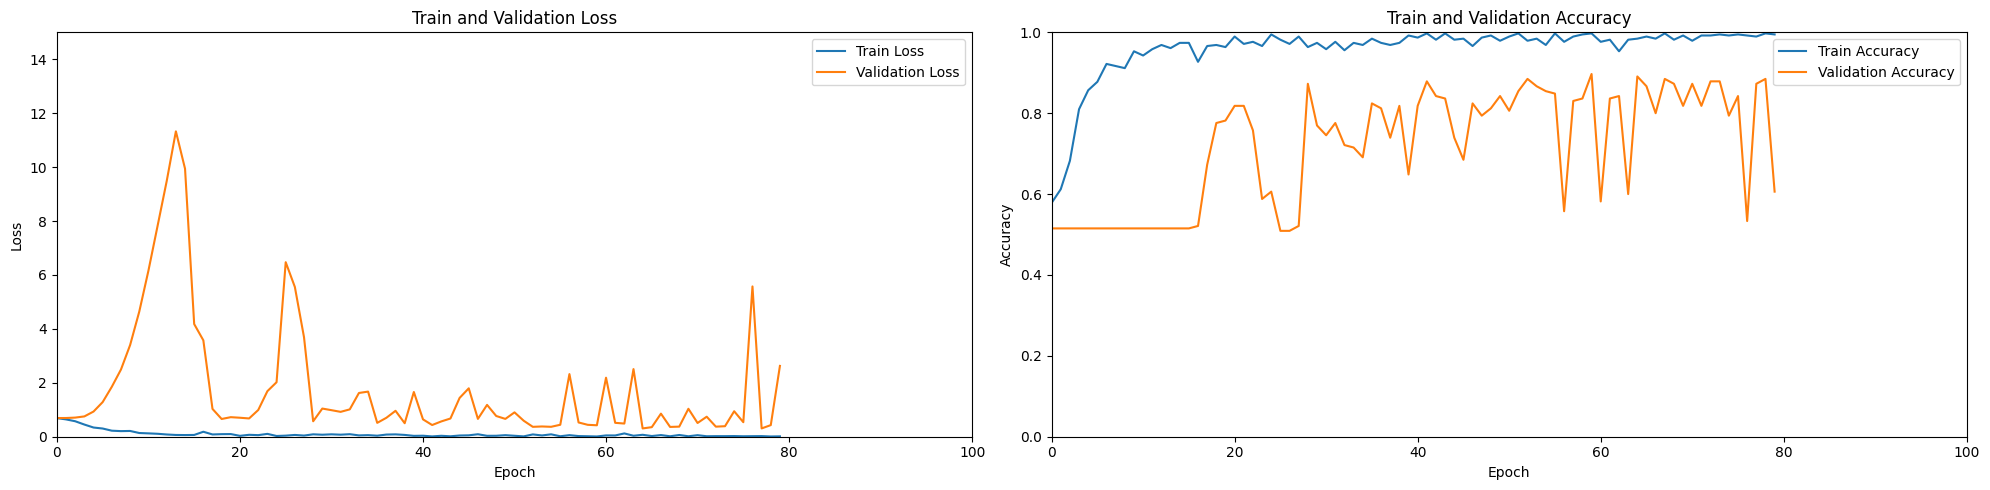

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(trained_model1.history['loss'],label="Train Loss")
plt.plot(trained_model1.history['val_loss'], label="Validation Loss")
plt.xlim(0,100)
plt.ylim(0,15)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(trained_model1.history['binary_accuracy'], label="Train Accuracy")
plt.plot(trained_model1.history['val_binary_accuracy'], label="Validation Accuracy")
plt.xlim(0,100)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_test)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_test.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.94      0.68        18
           1       0.83      0.25      0.38        20

    accuracy                           0.58        38
   macro avg       0.68      0.60      0.53        38
weighted avg       0.69      0.58      0.52        38



In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred_prob = model.predict(x_val)

y_pred_classes = (y_pred_prob >= 0.5).astype(int).reshape(-1)
y_true = y_val.reshape(-1)

class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", class_report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        85
           1       0.92      0.86      0.89        80

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165



In [ ]:
model.save('/content/drive/MyDrive/Models/OnevAll-New.h5')